In [25]:
import numpy as np      # noqa
import cv2
from matplotlib import pyplot as plt
import imutils

image =  'PLGlnWj.png'
img = cv2.imread(image)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgray =  imgray * 255
ret, thresh = cv2.threshold(imgray, 127, 255, 0)


kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
dilation = cv2.dilate(thresh, kernel, iterations=1 )

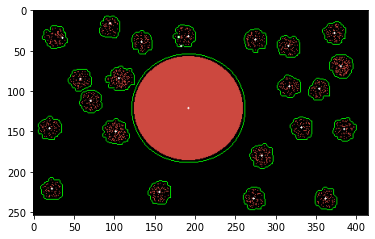

In [27]:
edges = cv2.Canny(dilation,150,200)
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    try:
        M = cv2.moments(contour)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    except ZeroDivisionError:
        pass

    contornos = cv2.drawContours(img, [contour], -1, (0,255,0), 1)
    cv2.circle(img, (cX, cY), 1, (255,255,255), -1)
    cv2.imwrite('imagem_resultado.png', img)
    plt.imshow(img)

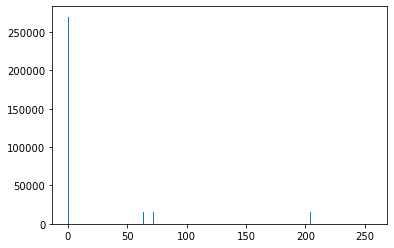

In [5]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [21]:
len(contours[0])

30